In [5]:
import pandas as pd
import numpy as np
import os
import sys
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import argparse
import missingno as msno


In [6]:
starterdata = pd.read_csv("C:/Users/felix/OneDrive/McGill Master Work/1 - Winter 25/ORGB 672 - Org Networks/Group Project/USTPO_Patent_Approval_Network_Analytics/Data/00_starterdata_cleaned(Approach_1).csv")
edges = pd.read_csv("C:/Users/felix/OneDrive/McGill Master Work/1 - Winter 25/ORGB 672 - Org Networks/Group Project/USTPO_Patent_Approval_Network_Analytics/Data/00_edges_cleaned(Approach_1).csv")

# Group Project EDA

In [7]:
import networkx as nx
import pandas as pd

# Assuming edges and starterdata DataFrames are already loaded
# edges = pd.read_csv('edges.csv')
# starterdata = pd.read_csv('starterdata.csv')

# Create a network graph using networkx
G = nx.DiGraph()

# Add edges from the edges DataFrame
for _, row in edges.iterrows():
    G.add_edge(row['ego_examiner_id'], row['alter_examiner_id'])

# Print basic network statistics
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

# Merge edges with starterdata to get gender and workgroup information
edges_with_attributes = edges.copy()

# Create dictionaries for mapping examiner_id to attributes
gender_map = starterdata.set_index('examiner_id')['gender'].to_dict()
workgroup_map = starterdata.set_index('examiner_id')['workgroup'].to_dict()
center_map = starterdata.set_index('examiner_id')['tech_center'].to_dict()
race_map = starterdata.set_index('examiner_id')['race'].to_dict()
au_map = starterdata.set_index('examiner_id')['au'].to_dict()


# Add attributes to edges
edges_with_attributes['ego_gender'] = edges_with_attributes['ego_examiner_id'].map(gender_map)
edges_with_attributes['alter_gender'] = edges_with_attributes['alter_examiner_id'].map(gender_map)
edges_with_attributes['ego_workgroup'] = edges_with_attributes['ego_examiner_id'].map(workgroup_map)
edges_with_attributes['alter_workgroup'] = edges_with_attributes['alter_examiner_id'].map(workgroup_map)
edges_with_attributes['ego_race'] = edges_with_attributes['ego_examiner_id'].map(race_map)
edges_with_attributes['alter_race'] = edges_with_attributes['alter_examiner_id'].map(race_map)

edges_with_attributes['alter_au'] = edges_with_attributes['alter_examiner_id'].map(au_map)
edges_with_attributes['ego_au'] = edges_with_attributes['ego_examiner_id'].map(au_map)

# Add attributes to the nodes in the graph
for node in G.nodes():
    if node in gender_map:
        G.nodes[node]['gender'] = gender_map[node]
    if node in workgroup_map:
        G.nodes[node]['workgroup'] = workgroup_map[node]
    if node in center_map:
        G.nodes[node]['tech_center'] = center_map[node]
    if node in race_map:
        G.nodes[node]['race'] = race_map[node]

# Save the graph as a GraphML file
nx.write_graphml(G, "network_graph.graphml")
# Save the edges with attributes to a CSV file
edges_with_attributes.to_csv('edges_with_attributes.csv', index=False)



Number of nodes: 2400
Number of edges: 6385


In [8]:
print(f"Columns Edges: {edges.columns}")
print(f"Columns Starterdata: {starterdata.columns}")

Columns Edges: Index(['application_number', 'advice_date', 'ego_examiner_id',
       'alter_examiner_id'],
      dtype='object')
Columns Starterdata: Index(['application_number', 'examiner_id', 'au', 'app_filing_date',
       'app_last_action_date', 'app_disposal_type', 'gender', 'race',
       'examiner_earliest_date', 'tech_center', 'center_name', 'workgroup',
       'processing_time'],
      dtype='object')


# Data Dictionary

#### Edges DataFrame

| Column Name         | Description                                                                 | Data Type |
|---------------------|-----------------------------------------------------------------------------|-----------|
| application_number  | The unique identifier for the patent application.                          | String    |
| advice_date         | The date when the advice or interaction occurred.                           | Date      |
| ego_examiner_id     | The ID of the examiner who is the source of the advice or interaction.      | Integer   |
| alter_examiner_id   | The ID of the examiner who is the target of the advice or interaction.      | Integer   |

#### Starterdata DataFrame

| Column Name             | Description                                                                 | Data Type |
|-------------------------|-----------------------------------------------------------------------------|-----------|
| application_number      | The unique identifier for the patent application.                          | String    |
| examiner_id             | The unique ID of the examiner.                                              | Integer   |
| au                      | The art unit (workgroup) to which the examiner belongs.                     | String    |
| app_filing_date         | The date when the patent application was filed.                             | Date      |
| app_last_action_date    | The date of the last action taken on the patent application.                | Date      |
| app_disposal_type       | The type of disposal for the patent application (e.g., granted, abandoned).| String    |
| gender                  | The gender of the examiner.                                                | String    |
| race                    | The race of the examiner.                                                   | String    |
| examiner_earliest_date  | The earliest date associated with the examiner's tenure or hiring.          | Date      |
| workgroup               | The workgroup to which the examiner belongs.                                | String    |
| tech_center             | The technology center associated with the examiner's work.                  | String    |
| center_name             | The name of the center where the examiner works.                            | String    |


In [9]:
print("starterdata")
display(starterdata.head(5))

print("Edges")
display(edges.head(5))

starterdata


,application_number,examiner_id,au,app_filing_date,app_last_action_date,app_disposal_type,gender,race,examiner_earliest_date,tech_center,center_name,workgroup,processing_time
0,8284457,96082.0,1764,2000-01-26,2003-01-30,ISS,female,white,2000-01-10,17,Chemical_Materials-Engineering,176,1100
1,8413193,87678.0,1764,2000-10-11,2010-09-27,ISS,Other,white,2000-01-04,17,Chemical_Materials-Engineering,176,3638
2,8531853,63213.0,1752,2000-05-17,2009-03-30,ISS,female,white,2000-01-06,17,Chemical_Materials-Engineering,175,3239
3,8637752,73788.0,1648,2001-07-20,2009-09-07,ISS,female,white,2000-01-04,16,Biotechnology_Organic,164,2971
4,8682726,77294.0,1762,2000-04-10,2001-04-19,ABN,male,white,2000-01-03,17,Chemical_Materials-Engineering,176,374


Edges


,application_number,advice_date,ego_examiner_id,alter_examiner_id
0,9402488,17/11/2008,84356.0,66266.0
1,9402488,17/11/2008,84356.0,63519.0
2,9402488,17/11/2008,84356.0,98531.0
3,9445135,21/08/2008,92953.0,93865.0
4,9445135,21/08/2008,92953.0,91818.0


# Graph Analysis

In [10]:
from scipy.stats import chi2_contingency
import pandas as pd
import numpy as np
import os
import sys
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import argparse
import missingno as msno

# Load the GraphML file
G = nx.read_graphml('network_graph.graphml')

# Print basic information about the graph
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")


# Extract node attributes into a DataFrame
node_data = []
for node, data in G.nodes(data=True):
    node_data.append(data)

df = pd.DataFrame(node_data)

Number of nodes: 2400
Number of edges: 6385


In [11]:
# Check for the presence of the 'gender' attribute in all nodes
missing_gender_nodes = [node for node, data in G.nodes(data=True) if 'gender' not in data]



# List of nodes to remove
nodes_to_remove = [node for node in G.nodes() if 'gender' not in G.nodes[node]]

# Remove nodes with missing 'gender' attribute
G.remove_nodes_from(nodes_to_remove)

# Verify the removal
missing_gender_nodes_after_removal = [node for node in G.nodes() if 'gender' not in G.nodes[node]]

if not missing_gender_nodes_after_removal:
    print("All nodes with missing 'gender' attribute have been removed.")
else:
    print("There are still nodes missing the 'gender' attribute.")


All nodes with missing 'gender' attribute have been removed.


## EDA 

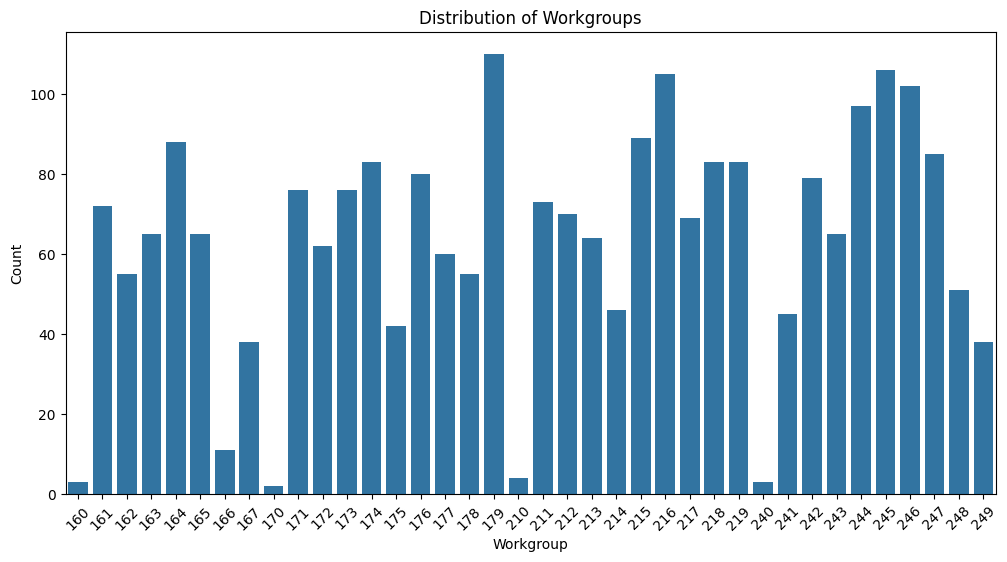

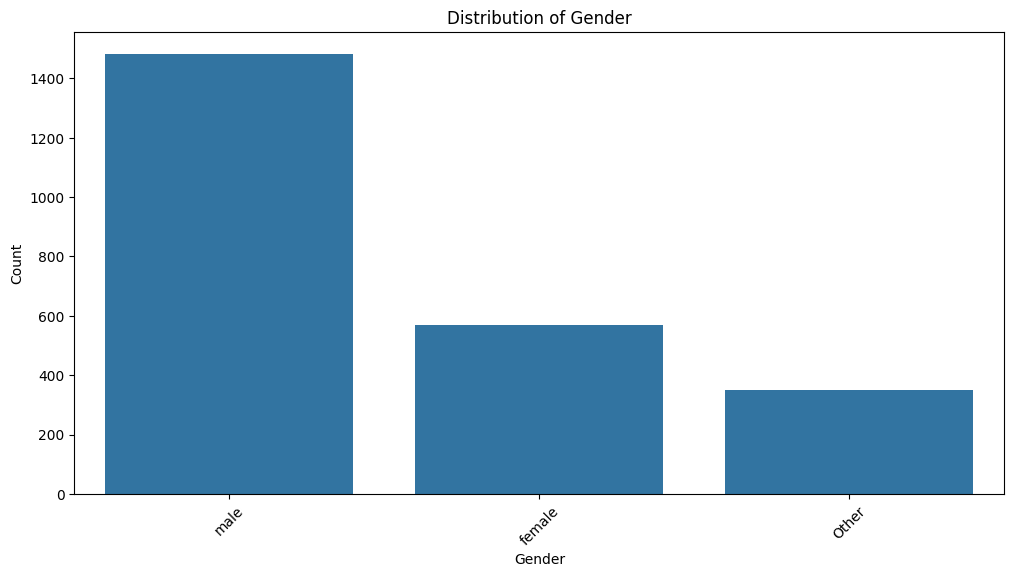

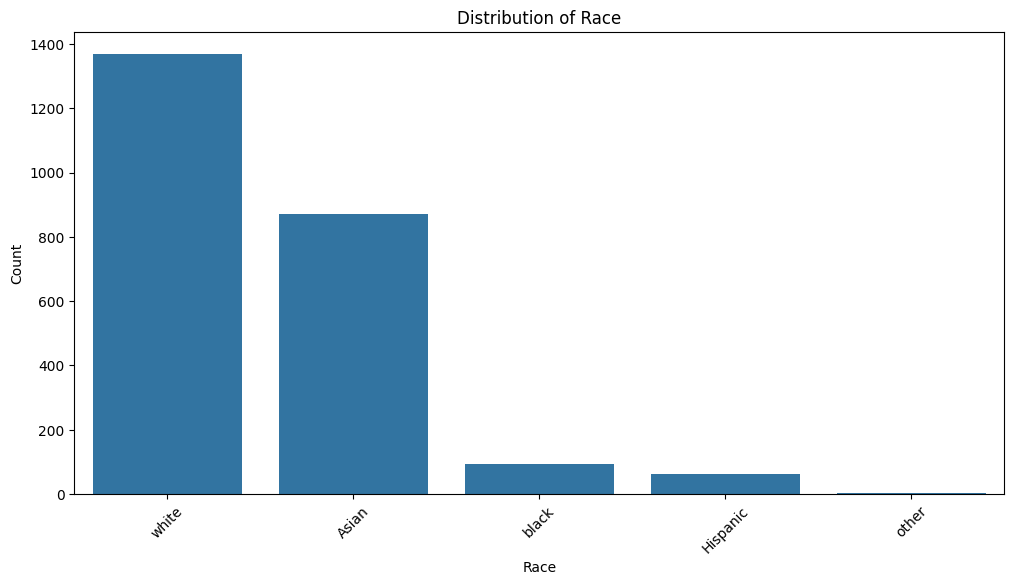

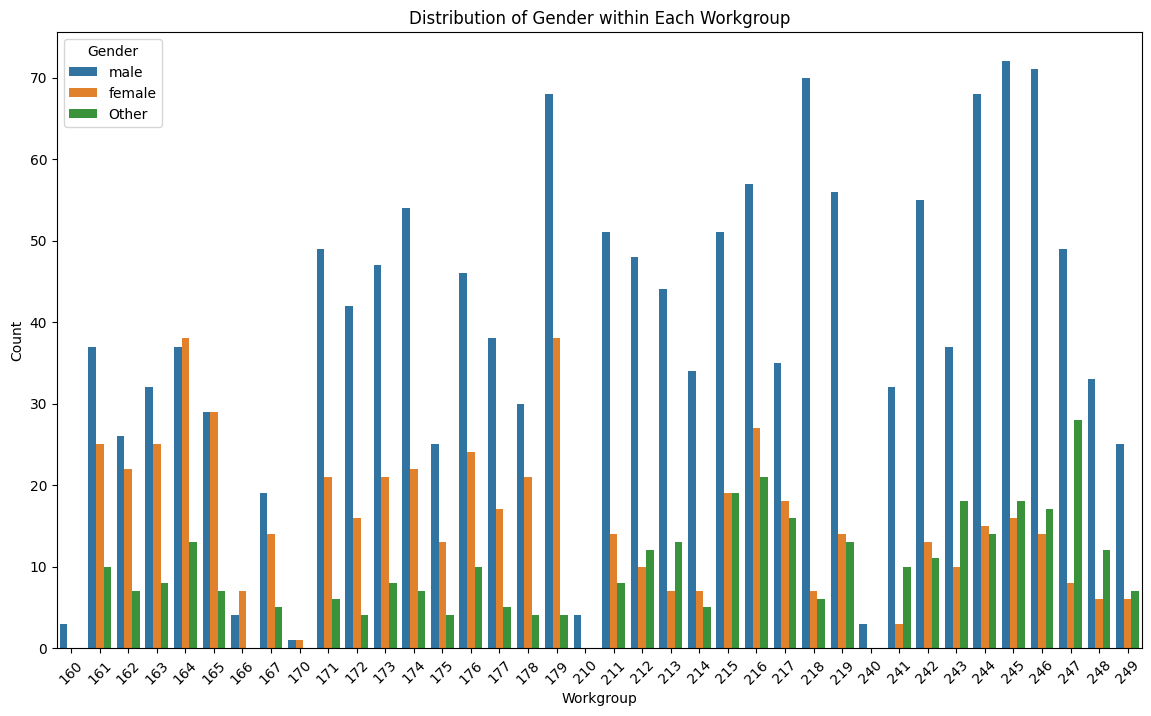

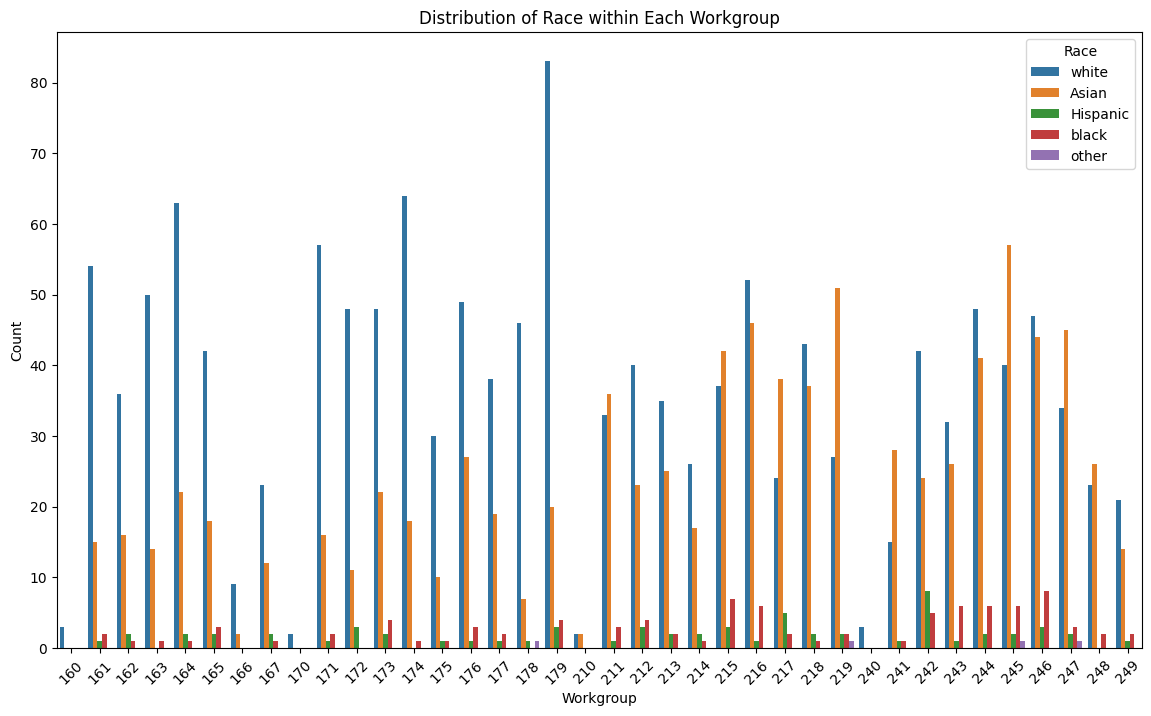

In [12]:



# Plot the distribution of workgroups
plt.figure(figsize=(12, 6))
sns.countplot(x='workgroup', data=df)
plt.title('Distribution of Workgroups')
plt.xlabel('Workgroup')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plot the distribution of gender
plt.figure(figsize=(12, 6))
sns.countplot(x='gender', data=df)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plot the distribution of race
plt.figure(figsize=(12, 6))
sns.countplot(x='race', data=df)
plt.title('Distribution of Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()





# Plot the distribution of gender within each workgroup
plt.figure(figsize=(14, 8))
sns.countplot(x='workgroup', hue='gender', data=df)
plt.title('Distribution of Gender within Each Workgroup')
plt.xlabel('Workgroup')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

# Plot the distribution of race within each workgroup
plt.figure(figsize=(14, 8))
sns.countplot(x='workgroup', hue='race', data=df)
plt.title('Distribution of Race within Each Workgroup')
plt.xlabel('Workgroup')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Race')
plt.show()


Gender distribution by workgroup:


count              proportion                    
gender    Other female  male      Other    female      male
workgroup                                                  
160         0.0    0.0   3.0   0.000000  0.000000  1.000000
161        10.0   25.0  37.0   0.138889  0.347222  0.513889
162         7.0   22.0  26.0   0.127273  0.400000  0.472727
163         8.0   25.0  32.0   0.123077  0.384615  0.492308
164        13.0   38.0  37.0   0.147727  0.431818  0.420455
165         7.0   29.0  29.0   0.107692  0.446154  0.446154
166         0.0    7.0   4.0   0.000000  0.636364  0.363636
167         5.0   14.0  19.0   0.131579  0.368421  0.500000
170         0.0    1.0   1.0   0.000000  0.500000  0.500000
171         6.0   21.0  49.0   0.078947  0.276316  0.644737
172         4.0   16.0  42.0   0.064516  0.258065  0.677419
173         8.0   21.0  47.0   0.105263  0.276316  0.618421
174         7.0   22.0  54.0   0.084337  0.265060  0.650602
175         4.0   13.0  25.0   0.095238  0.309524  0.595238
176        10.0   24.0  46.0   0.125000  0.300000  0.575000
177         5.0   17.0  38.0   0.083333  0.283333  0.633333
178         4.0   21.0  30.0   0.072727  0.381818  0.545455
179         4.0   38.0  68.0   0.036364  0.345455  0.618182
210         0.0    0.0   4.0   0.000000  0.000000  1.000000
211         8.0   14.0  51.0   0.109589  0.191781  0.698630
212        12.0   10.0  48.0   0.171429  0.142857  0.685714
213        13.0    7.0  44.0   0.203125  0.109375  0.687500
214         5.0    7.0  34.0   0.108696  0.152174  0.739130
215        19.0   19.0  51.0   0.213483  0.213483  0.573034
216        21.0   27.0  57.0   0.200000  0.257143  0.542857
217        16.0   18.0  35.0   0.231884  0.260870  0.507246
218         6.0    7.0  70.0   0.072289  0.084337  0.843373
219        13.0   14.0  56.0   0.156627  0.168675  0.674699
240         0.0    0.0   3.0   0.000000  0.000000  1.000000
241        10.0    3.0  32.0   0.222222  0.066667  0.711111
242        11.0   13.0  55.0   0.139241  0.164557  0.696203
243        18.0   10.0  37.0   0.276923  0.153846  0.569231
244        14.0   15.0  68.0   0.144330  0.154639  0.701031
245        18.0   16.0  72.0   0.169811  0.150943  0.679245
246        17.0   14.0  71.0   0.166667  0.137255  0.696078
247        28.0    8.0  49.0   0.329412  0.094118  0.576471
248        12.0    6.0  33.0   0.235294  0.117647  0.647059
249         7.0    6.0  25.0   0.184211  0.157895  0.657895


Race distribution by workgroup:


count                            proportion                      \
race      Asian Hispanic black other white      Asian  Hispanic     black   
workgroup                                                                   
160         0.0      0.0   0.0   0.0   3.0   0.000000  0.000000  0.000000   
161        15.0      1.0   2.0   0.0  54.0   0.208333  0.013889  0.027778   
162        16.0      2.0   1.0   0.0  36.0   0.290909  0.036364  0.018182   
163        14.0      0.0   1.0   0.0  50.0   0.215385  0.000000  0.015385   
164        22.0      2.0   1.0   0.0  63.0   0.250000  0.022727  0.011364   
165        18.0      2.0   3.0   0.0  42.0   0.276923  0.030769  0.046154   
166         2.0      0.0   0.0   0.0   9.0   0.181818  0.000000  0.000000   
167        12.0      2.0   1.0   0.0  23.0   0.315789  0.052632  0.026316   
170         0.0      0.0   0.0   0.0   2.0   0.000000  0.000000  0.000000   
171        16.0      1.0   2.0   0.0  57.0   0.210526  0.013158  0.026316   
172        11.0      3.0   0.0   0.0  48.0   0.177419  0.048387  0.000000   
173        22.0      2.0   4.0   0.0  48.0   0.289474  0.026316  0.052632   
174        18.0      0.0   1.0   0.0  64.0   0.216867  0.000000  0.012048   
175        10.0      1.0   1.0   0.0  30.0   0.238095  0.023810  0.023810   
176        27.0      1.0   3.0   0.0  49.0   0.337500  0.012500  0.037500   
177        19.0      1.0   2.0   0.0  38.0   0.316667  0.016667  0.033333   
178         7.0      1.0   0.0   1.0  46.0   0.127273  0.018182  0.000000   
179        20.0      3.0   4.0   0.0  83.0   0.181818  0.027273  0.036364   
210         2.0      0.0   0.0   0.0   2.0   0.500000  0.000000  0.000000   
211        36.0      1.0   3.0   0.0  33.0   0.493151  0.013699  0.041096   
212        23.0      3.0   4.0   0.0  40.0   0.328571  0.042857  0.057143   
213        25.0      2.0   2.0   0.0  35.0   0.390625  0.031250  0.031250   
214        17.0      2.0   1.0   0.0  26.0   0.369565  0.043478  0.021739   
215        42.0      3.0   7.0   0.0  37.0   0.471910  0.033708  0.078652   
216        46.0      1.0   6.0   0.0  52.0   0.438095  0.009524  0.057143   
217        38.0      5.0   2.0   0.0  24.0   0.550725  0.072464  0.028986   
218        37.0      2.0   1.0   0.0  43.0   0.445783  0.024096  0.012048   
219        51.0      2.0   2.0   1.0  27.0   0.614458  0.024096  0.024096   
240         0.0      0.0   0.0   0.0   3.0   0.000000  0.000000  0.000000   
241        28.0      1.0   1.0   0.0  15.0   0.622222  0.022222  0.022222   
242        24.0      8.0   5.0   0.0  42.0   0.303797  0.101266  0.063291   
243        26.0      1.0   6.0   0.0  32.0   0.400000  0.015385  0.092308   
244        41.0      2.0   6.0   0.0  48.0   0.422680  0.020619  0.061856   
245        57.0      2.0   6.0   1.0  40.0   0.537736  0.018868  0.056604   
246        44.0      3.0   8.0   0.0  47.0   0.431373  0.029412  0.078431   
247        45.0      2.0   3.0   1.0  34.0   0.529412  0.023529  0.035294   
248        26.0      0.0   2.0   0.0  23.0   0.509804  0.000000  0.039216   
249        14.0      1.0   2.0   0.0  21.0   0.368421  0.026316  0.052632   

                               
race          other     white  
workgroup                      
160        0.000000  1.000000  
161        0.000000  0.750000  
162        0.000000  0.654545  
163        0.000000  0.769231  
164        0.000000  0.715909  
165        0.000000  0.646154  
166        0.000000  0.818182  
167        0.000000  0.605263  
170        0.000000  1.000000  
171        0.000000  0.750000  
172        0.000000  0.774194  
173        0.000000  0.631579  
174        0.000000  0.771084  
175        0.000000  0.714286  
176        0.000000  0.612500  
177        0.000000  0.633333  
178        0.018182  0.836364  
179        0.000000  0.754545  
210        0.000000  0.500000  
211        0.000000  0.452055  
212        0.000000  0.571429  
213        0.000000  0.546875  
214        0.000000  0.565217  
215        0.000000 

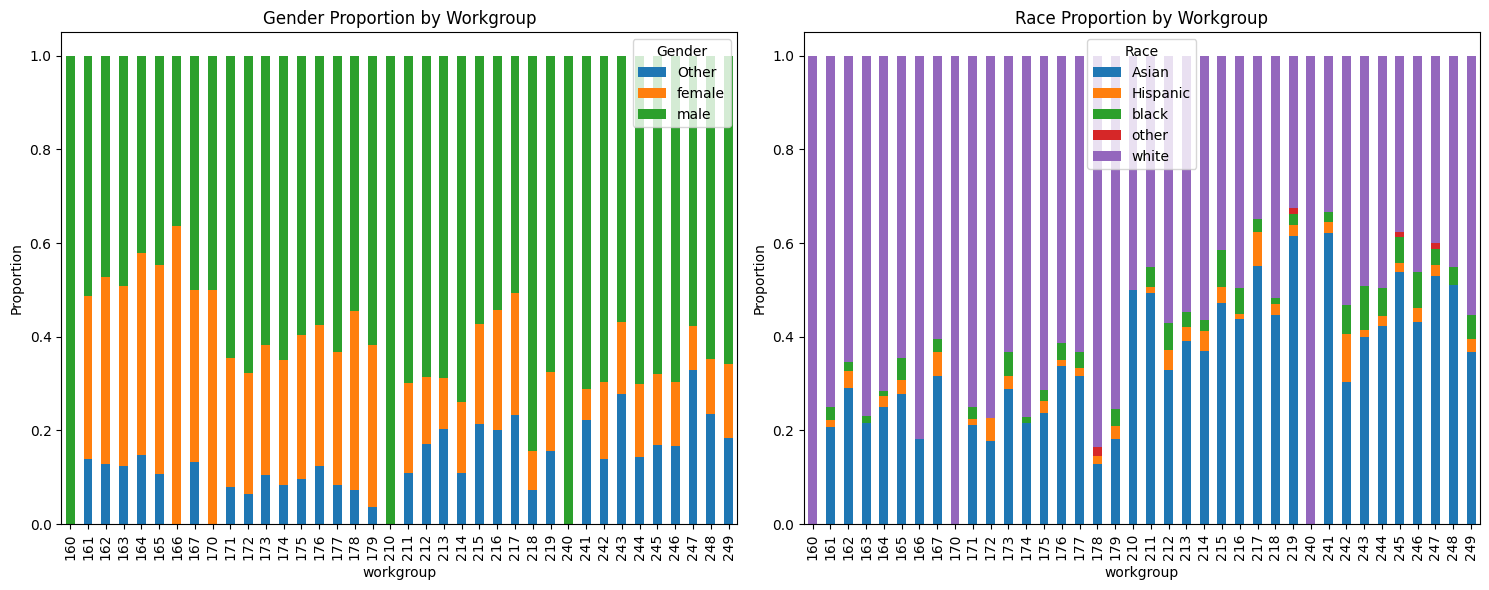

In [13]:


# Create DataFrames for workgroup statistics
# First, extract node attributes into a DataFrame for easier analysis
node_df = pd.DataFrame([data for node, data in G.nodes(data=True) if 'gender' in data and 'race' in data])

# Create gender dataset
gender_counts = node_df.groupby(['workgroup', 'gender']).size().reset_index(name='count')
gender_total = node_df.groupby('workgroup').size().reset_index(name='total')
gender_counts = gender_counts.merge(gender_total, on='workgroup')
gender_counts['proportion'] = gender_counts['count'] / gender_counts['total']

# Create a pivot table for gender
gender_pivot = pd.pivot_table(
    gender_counts, 
    values=['count', 'proportion'], 
    index='workgroup', 
    columns='gender'
).fillna(0)

# Create race dataset
race_counts = node_df.groupby(['workgroup', 'race']).size().reset_index(name='count')
race_total = node_df.groupby('workgroup').size().reset_index(name='total')
race_counts = race_counts.merge(race_total, on='workgroup')
race_counts['proportion'] = race_counts['count'] / race_counts['total']

# Create a pivot table for race
race_pivot = pd.pivot_table(
    race_counts, 
    values=['count', 'proportion'], 
    index='workgroup', 
    columns='race'
).fillna(0)

# Display results
print("Gender distribution by workgroup:")
#display(gender_counts)

#print("\nGender distribution:")
display(gender_pivot)

print("\nRace distribution by workgroup:")
#display(race_counts)

#print("\nRace distribution pivot table:")
display(race_pivot)

# Visualize the distributions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot gender proportions
gender_pivot['proportion'].plot(kind='bar', stacked=True, ax=ax1)
ax1.set_title('Gender Proportion by Workgroup')
ax1.set_ylabel('Proportion')
ax1.legend(title='Gender')

# Plot race proportions
race_pivot['proportion'].plot(kind='bar', stacked=True, ax=ax2)
ax2.set_title('Race Proportion by Workgroup')
ax2.set_ylabel('Proportion')
ax2.legend(title='Race')

plt.tight_layout()
plt.show()


- With these graphs we can very easy see by the domination of green on the first graph that it is very male dominated fairly equally across all workroups. 
- As to race it varies but with a big white domination. Some workgroups have a large proportion of asian but even when that occures, white is very present.

### Population homophily

In [14]:
from collections import Counter

#Calculate the distribution of attributes
gender_counts = Counter(df['gender'])
race_counts = Counter(df['race'])
workgroup_counts = Counter(df['workgroup'])

# Calculate the total number of nodes
total_nodes = df.shape[0]

# Calculate baseline homophily for gender
baseline_homophily_gender = sum(
    (count / total_nodes) ** 2 for count in gender_counts.values()
)

# Calculate baseline homophily for race
baseline_homophily_race = sum(
    (count / total_nodes) ** 2 for count in race_counts.values()
)

# Calculate baseline homophily for workgroup
baseline_homophily_workgroup = sum(
    (count / total_nodes) ** 2 for count in workgroup_counts.values()
)

print(f"Baseline Homophily (Gender): {baseline_homophily_gender}")
print(f"Baseline Homophily (Race): {baseline_homophily_race}")
print(f"Baseline Homophily (Workgroup): {baseline_homophily_workgroup}")

Baseline Homophily (Gender): 0.4585847222222223
Baseline Homophily (Race): 0.45927708333333334
Baseline Homophily (Workgroup): 0.03192986111111111


In [15]:
# Calculate the number of intra-group edges for gender
intra_gender_edges = sum(
    1 for u, v, data in G.edges(data=True)
    if G.nodes[u]['gender'] == G.nodes[v]['gender']
)

# Calculate the number of intra-group edges for race
intra_race_edges = sum(
    1 for u, v, data in G.edges(data=True)
    if G.nodes[u]['race'] == G.nodes[v]['race']
)

# Calculate the number of intra-group edges for workgroup
intra_workgroup_edges = sum(
    1 for u, v, data in G.edges(data=True)
    if G.nodes[u]['workgroup'] == G.nodes[v]['workgroup']
)

# Calculate the total number of edges
total_edges = G.number_of_edges()

# Calculate choice homophily for gender
choice_homophily_gender = intra_gender_edges / total_edges

# Calculate choice homophily for race
choice_homophily_race = intra_race_edges / total_edges

# Calculate choice homophily for workgroup
choice_homophily_workgroup = intra_workgroup_edges / total_edges

print(f"Choice Homophily (Gender): {choice_homophily_gender}")
print(f"Choice Homophily (Race): {choice_homophily_race}")
print(f"Choice Homophily (Workgroup): {choice_homophily_workgroup}")



Choice Homophily (Gender): 0.510415035238841
Choice Homophily (Race): 0.5364134690681285
Choice Homophily (Workgroup): 0.30462020360219266


Homophily Comparison:


,Attribute,Baseline_Homophily,Choice_Homophily,Difference,Normalized_Choice
0,Gender,0.458585,0.510415,0.051830,0.095731
1,Race,0.459277,0.536413,0.077136,0.142654
2,Workgroup,0.031930,0.304620,0.272690,0.281684


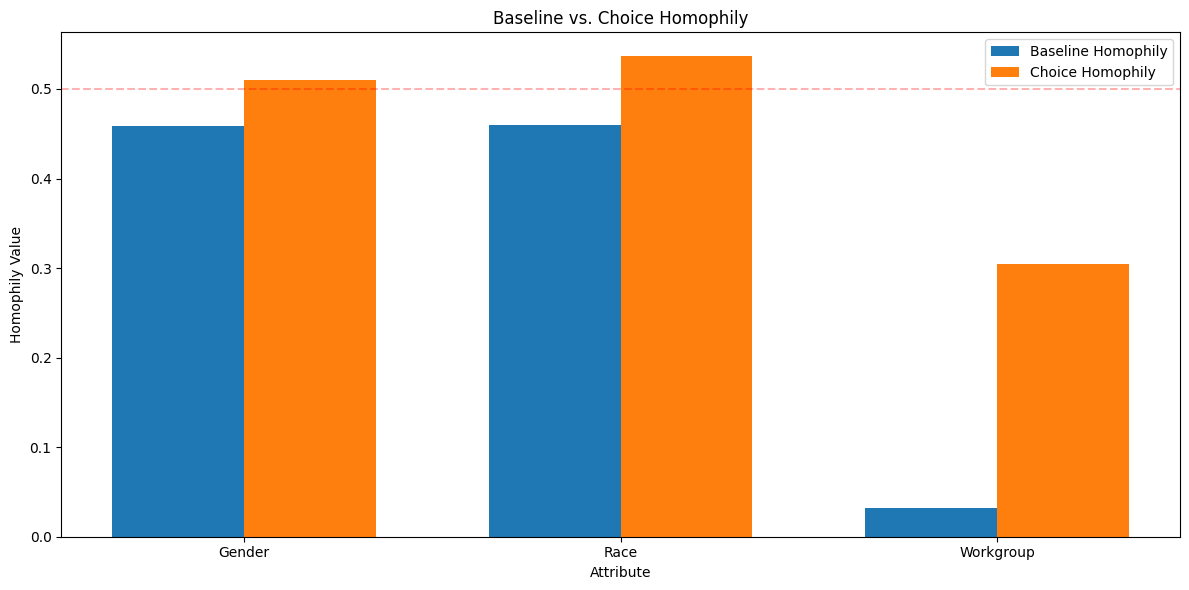

In [16]:
# Create a DataFrame to compare baseline homophily with choice homophily
homophily_df = pd.DataFrame({
    'Attribute': ['Gender', 'Race', 'Workgroup'],
    'Baseline_Homophily': [baseline_homophily_gender, baseline_homophily_race, baseline_homophily_workgroup],
    'Choice_Homophily': [choice_homophily_gender, choice_homophily_race, choice_homophily_workgroup]
})

# Add a column for the difference between choice and baseline homophily
homophily_df['Difference'] = homophily_df['Choice_Homophily'] - homophily_df['Baseline_Homophily']

# Add a column for the normalized choice homophily (choice homophily adjusted for baseline)
homophily_df['Normalized_Choice'] = (homophily_df['Choice_Homophily'] - homophily_df['Baseline_Homophily']) / (1 - homophily_df['Baseline_Homophily'])

# Display the DataFrame
print("Homophily Comparison:")
display(homophily_df)

# Create a bar chart to visualize the comparison
plt.figure(figsize=(12, 6))
width = 0.35
x = np.arange(len(homophily_df['Attribute']))

# Plot bars
plt.bar(x - width/2, homophily_df['Baseline_Homophily'], width, label='Baseline Homophily')
plt.bar(x + width/2, homophily_df['Choice_Homophily'], width, label='Choice Homophily')

# Add labels and title
plt.xlabel('Attribute')
plt.ylabel('Homophily Value')
plt.title('Baseline vs. Choice Homophily')
plt.xticks(x, homophily_df['Attribute'])
plt.legend()

# Add horizontal line at y=0.5 for reference
plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

- People are more likely to choose others similar to themselves than would occur by chance, especially along certain attributes.

- Gender has a slightly higher normalised homophily than race.

Gender and Race show choice-based homophily, but less so than Workgroup:

    - Gender: +7.7% increase, ~15% of the max strength.

    - Race: +5% increase, ~13.8% of the max strength.

In [17]:


# plt.figure(figsize=(12, 6))
# sns.countplot(data=starterdata, x='workgroup', hue='gender')
# plt.title('Gender Distribution Across Workgroups')
# plt.xlabel('Workgroup')
# plt.ylabel('Count')
# plt.legend(title='Gender')
# plt.show()


# # Contingency table for gender and workgroup
contingency_table_gender = pd.crosstab(df['workgroup'], df['gender'])
# print("Contingency Table for Gender and Workgroup:")
# print(contingency_table_gender)

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table_gender)

print("Chi-square Test Results Gender Distribution Across Workgroups:")
# Output the results
print(f"Chi-square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
# print("Expected Frequencies:")
# print(expected)



Chi-square Test Results Gender Distribution Across Workgroups:
Chi-square Statistic: 230.52727287301812
P-value: 5.652612166033815e-18
Degrees of Freedom: 74


Gender distribution is not random across workgroups — some groups have significantly more men or women than we'd expect by chance

In [18]:
# plt.figure(figsize=(12, 6))
# sns.countplot(data=starterdata, x='workgroup', hue='race')
# plt.title('Race Distribution Across Workgroups')
# plt.xlabel('Workgroup')
# plt.ylabel('Count')
# plt.legend(title='Race')
# plt.show()


# # Contingency table for race and workgroup
contingency_table_race = pd.crosstab(df['workgroup'], df['race'])
# print("Contingency Table for Race and Workgroup:")
# print(contingency_table_race)

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table_race)

print("Chi-square Test Results Race Distribution Across Workgroups:")

# Output the results
print(f"Chi-square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
# print("Expected Frequencies:")
# print(expected)



Chi-square Test Results Race Distribution Across Workgroups:
Chi-square Statistic: 302.99113684585996
P-value: 1.0135730073567087e-12
Degrees of Freedom: 148


Race distribution is not random across workgroups — some groups have significantly more of one race than we'd expect by chance

## Workgroup Focus
I will focuss on workroup 179 and 178

In [19]:
import pandas as pd

# Filter the graph to include only nodes in workgroups 179 and 178
workgroups_of_interest = [178.0, 179.0]
filtered_nodes = [node for node, data in G.nodes(data=True) if 'workgroup' in data and data['workgroup'] in workgroups_of_interest]

# Create a subgraph with only the filtered nodes
subgraph = G.subgraph(filtered_nodes).copy()

# Check if the subgraph is not empty
if subgraph.number_of_nodes() > 0:
    print(f"Number of nodes in the filtered subgraph: {subgraph.number_of_nodes()}")
    print(f"Number of edges in the filtered subgraph: {subgraph.number_of_edges()}")
    
    # Calculate various centrality measures
    betweenness_centrality = nx.betweenness_centrality(subgraph)
    degree_centrality = nx.degree_centrality(subgraph)
    in_degree_centrality = nx.in_degree_centrality(subgraph)
    out_degree_centrality = nx.out_degree_centrality(subgraph)
    closeness_centrality = nx.closeness_centrality(subgraph)
    
    try:
        # These might fail if the graph is not strongly connected
        eigenvector_centrality = nx.eigenvector_centrality(subgraph, max_iter=1000)
        hub_score, authority_score = nx.hits(subgraph, max_iter=1000)
    except:
        eigenvector_centrality = {}
        hub_score, authority_score = {}, {}
        print("Note: Could not compute eigenvector centrality or HITS (graph not strongly connected)")
    
    # Create a DataFrame with all metrics
    centrality_data = []
    
    for node in subgraph.nodes():
        centrality_data.append({
            'Examiner_ID': node,
            'Gender': G.nodes[node].get('gender', 'Unknown'),
            'Race': G.nodes[node].get('race', 'Unknown'),
            'Workgroup': G.nodes[node].get('workgroup', 'Unknown'),
            'Betweenness': betweenness_centrality.get(node, 0),
            'Degree': degree_centrality.get(node, 0),
            'In_Degree': in_degree_centrality.get(node, 0),
            'Out_Degree': out_degree_centrality.get(node, 0),
            'Closeness': closeness_centrality.get(node, 0),
            'Eigenvector': eigenvector_centrality.get(node, 0),
            'Hub_Score': hub_score.get(node, 0),
            'Authority_Score': authority_score.get(node, 0)
        })
    
    # Create DataFrame
    centrality_df = pd.DataFrame(centrality_data)
    
    # Display summary stats
    print("\nCentrality measures summary:")
    display(centrality_df.describe())
    
    # Display top 10 examiners by betweenness centrality
    print("\nTop 10 examiners by betweenness centrality in workgroups 179 and 178:")
    top_betweenness_df = centrality_df.sort_values('Betweenness', ascending=False).head(10)
    display(top_betweenness_df[['Examiner_ID', 'Gender', 'Race', 'Betweenness']])
    
    # Display top 10 examiners by degree centrality
    print("\nTop 10 examiners by degree centrality:")
    top_degree_df = centrality_df.sort_values('Degree', ascending=False).head(10)
    display(top_degree_df[['Examiner_ID', 'Gender', 'Race', 'Degree']])
    
    # Display top 10 examiners by in-degree centrality
    print("\nTop 10 examiners by in-degree centrality (receiving advice):")
    top_in_degree_df = centrality_df.sort_values('In_Degree', ascending=False).head(10)
    display(top_in_degree_df[['Examiner_ID', 'Gender', 'Race', 'In_Degree']])
    
    # Display top 10 examiners by out-degree centrality
    print("\nTop 10 examiners by out-degree centrality (giving advice):")
    top_out_degree_df = centrality_df.sort_values('Out_Degree', ascending=False).head(10)
    display(top_out_degree_df[['Examiner_ID', 'Gender', 'Race', 'Out_Degree']])

    # Display top 10 examiners by Eigenvector
    print("\nTop 10 examiners by Eigenvector:")
    top_out_degree_df = centrality_df.sort_values('Eigenvector', ascending=False).head(10)
    display(top_out_degree_df[['Examiner_ID', 'Gender', 'Race', 'Eigenvector']])
    
    # Identify isolated nodes in the subgraph
    isolated_nodes = [node for node, degree in dict(subgraph.degree()).items() if degree == 0]
    print(f"\nNumber of isolated nodes: {len(isolated_nodes)}")
    if len(isolated_nodes) > 0:
        print(f"Isolated nodes exist, but details are hidden for brevity")
        # Uncomment the line below to see example isolated nodes
        #print(f"Example isolated nodes: {isolated_nodes[:5]}")
else:
    print("No nodes found in workgroups 178 and 179 in the graph.")




Number of nodes in the filtered subgraph: 165
Number of edges in the filtered subgraph: 127

Centrality measures summary:


,Workgroup,Betweenness,Degree,In_Degree,Out_Degree,Closeness,Eigenvector,Hub_Score,Authority_Score
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,1.650000e+02,1.650000e+02,1.650000e+02
mean,178.666667,0.000005,0.009387,0.004693,0.004693,0.004550,2.584243e-02,6.060606e-03,6.060606e-03
std,0.472840,0.000044,0.011692,0.008534,0.009418,0.009189,7.365906e-02,1.943213e-02,1.677842e-02
min,178.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.176879e-09,-1.170296e-17,-2.448889e-17
25%,178.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.176879e-09,0.000000e+00,-2.192376e-18
50%,179.000000,0.000000,0.006098,0.000000,0.000000,0.000000,3.176879e-09,0.000000e+00,6.721039e-19
75%,179.000000,0.000000,0.012195,0.006098,0.006098,0.006098,8.577574e-08,0.000000e+00,9.305142e-18
max,179.000000,0.000486,0.060976,0.048780,0.060976,0.052700,4.264340e-01,1.489305e-01,1.195775e-01



Top 10 examiners by betweenness centrality in workgroups 179 and 178:


,Examiner_ID,Gender,Race,Betweenness
117,71388.0,female,white,0.000486
93,93732.0,male,white,0.000262
27,63219.0,female,white,0.000075
24,76927.0,female,white,0.000075
2,62610.0,male,white,0.000000
4,61328.0,male,white,0.000000
3,83601.0,male,white,0.000000
5,93636.0,male,other,0.000000
6,91423.0,male,white,0.000000
9,99876.0,female,white,0.000000



Top 10 examiners by degree centrality:


,Examiner_ID,Gender,Race,Degree
58,79847.0,female,white,0.060976
81,87049.0,male,white,0.060976
93,93732.0,male,white,0.054878
117,71388.0,female,white,0.042683
146,80730.0,male,white,0.042683
57,65271.0,male,white,0.030488
63,91352.0,female,white,0.030488
70,62284.0,male,white,0.030488
123,74579.0,male,Asian,0.030488
139,60078.0,female,white,0.030488



Top 10 examiners by in-degree centrality (receiving advice):


,Examiner_ID,Gender,Race,In_Degree
93,93732.0,male,white,0.048780
107,62778.0,female,white,0.030488
57,65271.0,male,white,0.030488
63,91352.0,female,white,0.030488
139,60078.0,female,white,0.030488
131,65934.0,female,white,0.030488
123,74579.0,male,Asian,0.030488
56,91426.0,female,white,0.024390
19,59456.0,male,Asian,0.024390
61,93859.0,female,white,0.024390



Top 10 examiners by out-degree centrality (giving advice):


,Examiner_ID,Gender,Race,Out_Degree
58,79847.0,female,white,0.060976
81,87049.0,male,white,0.060976
146,80730.0,male,white,0.042683
160,98546.0,Other,Asian,0.030488
5,93636.0,male,other,0.024390
108,69096.0,male,white,0.024390
70,62284.0,male,white,0.024390
142,98253.0,male,white,0.024390
122,99518.0,male,white,0.018293
150,70799.0,male,white,0.018293



Top 10 examiners by Eigenvector:


,Examiner_ID,Gender,Race,Eigenvector
107,62778.0,female,white,0.426434
93,93732.0,male,white,0.213201
123,74579.0,male,Asian,0.213197
63,91352.0,female,white,0.213197
96,66582.0,male,white,0.213197
49,70887.0,female,white,0.213197
15,64119.0,female,Hispanic,0.213197
1,87125.0,male,white,0.213197
45,59698.0,female,white,0.213197
39,98840.0,female,white,0.213197



Number of isolated nodes: 62
Isolated nodes exist, but details are hidden for brevity


General Graph Structure
- 175 nodes, 127 edges. a relatively sparse network.
- 72 isolated nodes. ~41% of people have no incoming or outgoing connections (they neither give nor receive advice).
    - This suggests a low level of connectivity, possibly due to siloed work or lack of engagement.

Centrality Measures
1. Betweenness Centrality
- Measures how often a node acts as a bridge on the shortest path between other nodes.
- Mean: ~0.000005, Max: 0.000432. very low overall values and few true "bridges" or brokers exist.
- Top node: Examiner 71388.0 (female, white) is the most central broker and possibly a key facilitator or information gatekeeper.


2. Degree Centrality (Overall Connectivity)
- Mean: 0.00834. most people are connected to very few others.
- Top nodes (79847.0, 87049.0) have the highest degree (0.057471), meaning they connect to ~5.7% of the network.
- Degree leaders tend to be white, with a gender mix.

3. In-Degree (Receiving Advice)
- Measures perceived expertise or popularity as an advice source.
- Examiner 93732.0 (male, white) is the top advice recipient.
- Mix of male/female, white/Asian and there is a diversity among recipients.

4. Out-Degree (Giving Advice)
- Measures how active or outgoing someone is in sharing advice.
- Examiner 79847.0 (female, white) and 87049.0 (male, white) are the most active advisors.
- Examiner 98546.0 (Other, Asian) is also in the top ranks and is intresting as is in a minority demographic.

5. Closeness
- Very low across the board and suggests a fragmented or slow-to-reach network.

6. Eigenvector, Hub, Authority Scores
- Very small and skewed toward a few nodes and again, few nodes dominate influence.
- Max eigenvector centrality = 0.426. This is a white female and is highly connected to other central nodes.



#### Examiner 71388 is the most structurally powerful bridge. They may be a key communicator, mentor, or coordinator.

- The fact that most betweenness values are 0 indicates a highly clustered or siloed network.

- Examiner 71388:
    - could be a mentors or trainer (bridging roles).
    - could be an information broker
    - strengthens the networks resilience by connecting isolated individuals.


In [20]:
# Extract data for examiner ID 71388.0
examiner_details = starterdata[starterdata['examiner_id'] == 71388.0]

# Display basic information
if not examiner_details.empty:
    print("Examiner ID 71388.0 Details:")
    print(f"Gender: {examiner_details['gender'].iloc[0]}")
    print(f"Race: {examiner_details['race'].iloc[0]}")
    print(f"Workgroup: {examiner_details['workgroup'].iloc[0]}")
    print(f"Tech Center: {examiner_details['tech_center'].iloc[0]}")
    print(f"Center Name: {examiner_details['center_name'].iloc[0]}")
    
    # Count patent applications processed by this examiner
    print(f"Number of patent applications: {len(examiner_details)}")
    
    # Look at network measures from centrality analysis
    print("\nNetwork Centrality Measures:")
    print(f"Betweenness Centrality: {betweenness_centrality.get('71388.0', 'Not available')}")
    print(f"Degree Centrality: {degree_centrality.get('71388.0', 'Not available')}")
    print(f"In-Degree Centrality: {in_degree_centrality.get('71388.0', 'Not available')}")
    print(f"Out-Degree Centrality: {out_degree_centrality.get('71388.0', 'Not available')}")
else:
    print("No details found for examiner ID 71388.0")

Examiner ID 71388.0 Details:
Gender: female
Race: white
Workgroup: 177
Tech Center: 17
Center Name: Chemical_Materials-Engineering
Number of patent applications: 651

Network Centrality Measures:
Betweenness Centrality: 0.00048630854406703575
Degree Centrality: 0.042682926829268296
In-Degree Centrality: 0.024390243902439025
Out-Degree Centrality: 0.01829268292682927


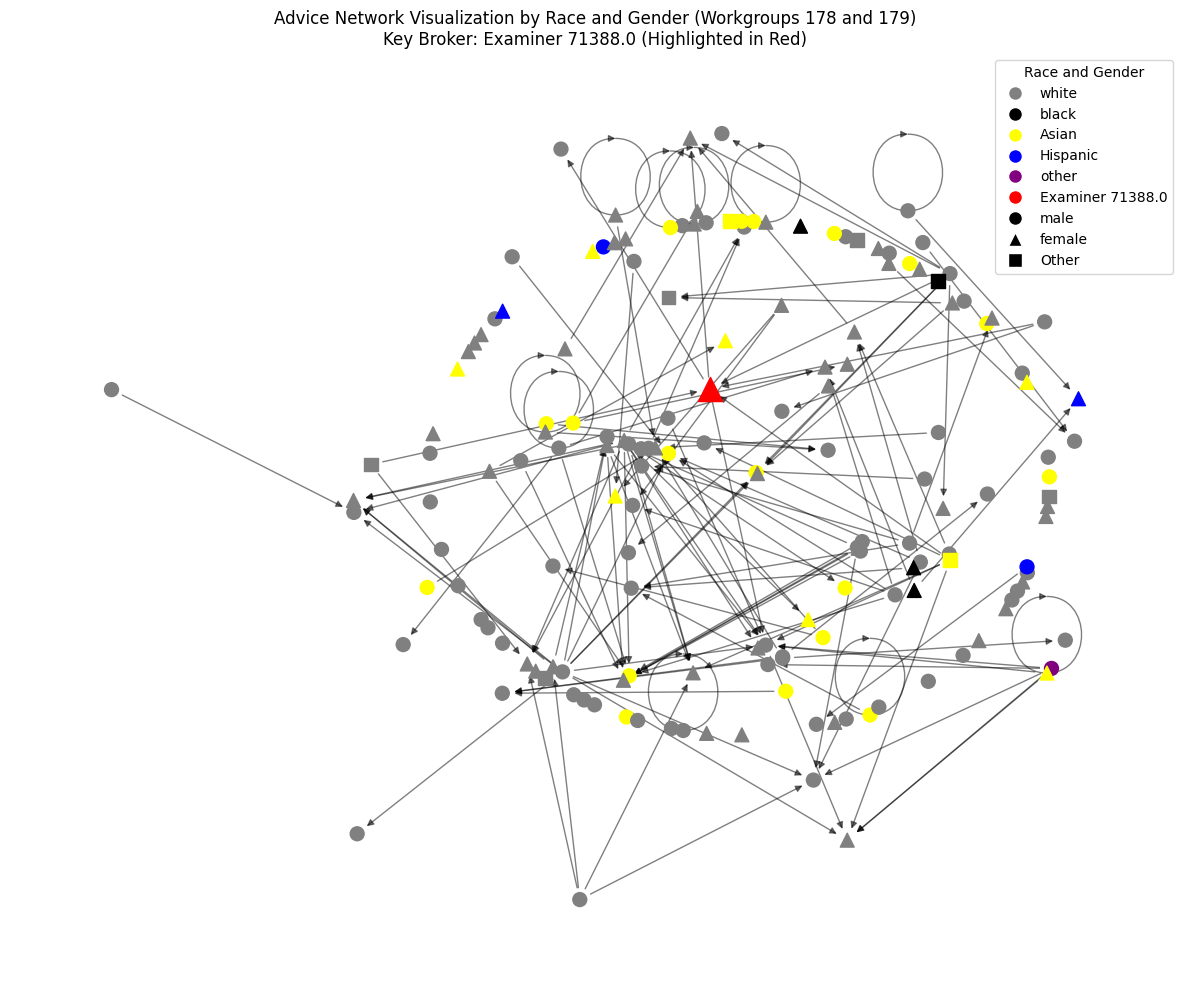

In [21]:
import matplotlib.pyplot as plt
import networkx as nx

# Assuming 'subgraph' is your filtered subgraph for workgroups 178 and 179

# Visualize the network with nodes colored by race and gender
plt.figure(figsize=(12, 10))

# Create a color map for race
race_to_color = {
    'white': 'grey',
    'black': 'black',
    'Asian': 'yellow',
    'Hispanic': 'blue',
    'other': 'purple'
}

# Create a color map for gender
gender_to_shape = {
    'male': 'o',
    'female': '^',
    'Other': 's'
}

# Get node colors based on race attribute
node_colors = []
node_shapes = []
for node in subgraph.nodes():
    race = subgraph.nodes[node].get('race', 'Unknown')
    gender = subgraph.nodes[node].get('gender', 'Unknown')
    # Highlight examiner 71388.0 in red
    if node == '71388.0':
        node_colors.append('red')
    else:
        node_colors.append(race_to_color.get(race, 'black'))
    node_shapes.append(gender_to_shape.get(gender, '^'))

# Create network layout
pos = nx.kamada_kawai_layout(subgraph)

# Draw nodes and edges
for shape in gender_to_shape.values():
    nodes_subset = [node for node, shape_node in zip(subgraph.nodes(), node_shapes) if shape_node == shape]
    nx.draw_networkx_nodes(subgraph, pos, nodelist=nodes_subset, node_color=[node_colors[i] for i, node in enumerate(subgraph.nodes()) if node in nodes_subset], node_shape=shape, node_size=100)

# Make node 71388.0 larger to highlight it
nx.draw_networkx_nodes(subgraph, pos, nodelist=['71388.0'], node_color='red', node_shape='^', node_size=300)

nx.draw_networkx_edges(subgraph, pos, alpha=0.5, arrows=True, arrowsize=10)

# Create legend for race and gender
legend_elements_race = [plt.Line2D([0], [0], marker='o', color='w',
                                   markerfacecolor=color, markersize=10, label=race)
                         for race, color in race_to_color.items()]
# Add the highlight for examiner 71388.0
legend_elements_race.append(plt.Line2D([0], [0], marker='o', color='w',
                                      markerfacecolor='red', markersize=10, label='Examiner 71388.0'))

legend_elements_gender = [plt.Line2D([0], [0], marker=shape, color='w',
                                     markerfacecolor='black', markersize=10, label=gender)
                           for gender, shape in gender_to_shape.items()]

plt.legend(handles=legend_elements_race + legend_elements_gender, title="Race and Gender", loc="upper right")

plt.title('Advice Network Visualization by Race and Gender (Workgroups 178 and 179)\nKey Broker: Examiner 71388.0 (Highlighted in Red)')
plt.axis('off')
plt.tight_layout()
plt.show()


Homophily Comparison:


,Attribute,Baseline_Homophily,Choice_Homophily,Difference,Normalized_Choice
0,Gender,0.482975,0.551181,0.068206,0.131920
1,Race,0.639229,0.685039,0.045811,0.126980
2,Workgroup,0.555556,0.811024,0.255468,0.574803


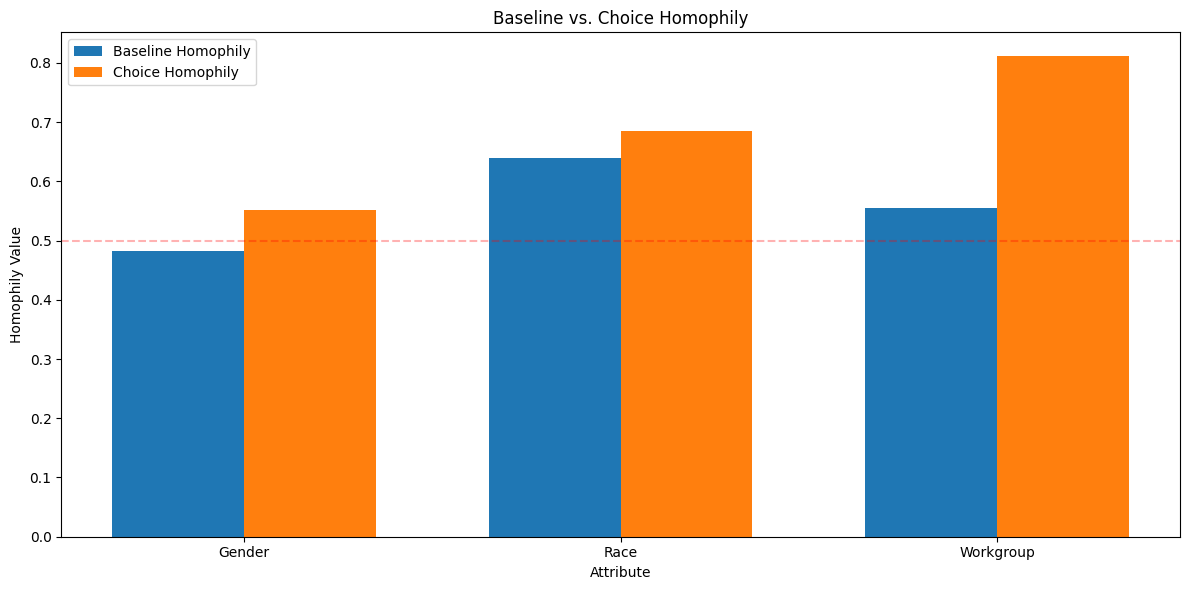

In [22]:
# Calculate the distribution of attributes in the subgraph
# Filter the subgraph to include only nodes in workgroups 178 and 179
# Calculate the distribution of attributes
gender_counts = Counter(data['gender'] for node, data in subgraph.nodes(data=True))
race_counts = Counter(data['race'] for node, data in subgraph.nodes(data=True))
workgroup_counts = Counter(data['workgroup'] for node, data in subgraph.nodes(data=True))

# Calculate the total number of nodes
total_nodes = subgraph.number_of_nodes()

# Calculate baseline homophily for gender
baseline_homophily_gender = sum(
    (count / total_nodes) ** 2 for count in gender_counts.values()
)

# Calculate baseline homophily for race
baseline_homophily_race = sum(
    (count / total_nodes) ** 2 for count in race_counts.values()
)

# Calculate baseline homophily for workgroup
baseline_homophily_workgroup = sum(
    (count / total_nodes) ** 2 for count in workgroup_counts.values()
)

# print(f"Baseline Homophily (Gender): {baseline_homophily_gender}")
# print(f"Baseline Homophily (Race): {baseline_homophily_race}")
# print(f"Baseline Homophily (Workgroup): {baseline_homophily_workgroup}")

# Calculate the number of intra-group edges for gender
intra_gender_edges = sum(
    1 for u, v, data in subgraph.edges(data=True)
    if subgraph.nodes[u]['gender'] == subgraph.nodes[v]['gender']
)

# Calculate the number of intra-group edges for race
intra_race_edges = sum(
    1 for u, v, data in subgraph.edges(data=True)
    if subgraph.nodes[u]['race'] == subgraph.nodes[v]['race']
)

# Calculate the number of intra-group edges for workgroup
intra_workgroup_edges = sum(
    1 for u, v, data in subgraph.edges(data=True)
    if subgraph.nodes[u]['workgroup'] == subgraph.nodes[v]['workgroup']
)

# Calculate the total number of edges
total_edges = subgraph.number_of_edges()

# Calculate choice homophily for gender
choice_homophily_gender = intra_gender_edges / total_edges

# Calculate choice homophily for race
choice_homophily_race = intra_race_edges / total_edges

# Calculate choice homophily for workgroup
choice_homophily_workgroup = intra_workgroup_edges / total_edges

# print(f"Choice Homophily (Gender): {choice_homophily_gender}")
# print(f"Choice Homophily (Race): {choice_homophily_race}")
# print(f"Choice Homophily (Workgroup): {choice_homophily_workgroup}")

# Create a DataFrame to compare baseline homophily with choice homophily
homophily_df = pd.DataFrame({
    'Attribute': ['Gender', 'Race', 'Workgroup'],
    'Baseline_Homophily': [baseline_homophily_gender, baseline_homophily_race, baseline_homophily_workgroup],
    'Choice_Homophily': [choice_homophily_gender, choice_homophily_race, choice_homophily_workgroup]
})

# Add a column for the difference between choice and baseline homophily
homophily_df['Difference'] = homophily_df['Choice_Homophily'] - homophily_df['Baseline_Homophily']

# Add a column for the normalized choice homophily (choice homophily adjusted for baseline)
homophily_df['Normalized_Choice'] = (homophily_df['Choice_Homophily'] - homophily_df['Baseline_Homophily']) / (1 - homophily_df['Baseline_Homophily'])

# Display the DataFrame
print("Homophily Comparison:")
display(homophily_df)

# Create a bar chart to visualize the comparison
plt.figure(figsize=(12, 6))
width = 0.35
x = np.arange(len(homophily_df['Attribute']))

# Plot bars
plt.bar(x - width/2, homophily_df['Baseline_Homophily'], width, label='Baseline Homophily')
plt.bar(x + width/2, homophily_df['Choice_Homophily'], width, label='Choice Homophily')

# Add labels and title
plt.xlabel('Attribute')
plt.ylabel('Homophily Value')
plt.title('Baseline vs. Choice Homophily')
plt.xticks(x, homophily_df['Attribute'])
plt.legend()

# Add horizontal line at y=0.5 for reference
plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


There is clear choice homophily between gender and race as shown by normalised choice.

## Graph subset of full network

In [24]:
tech_center_to_department = {
    16: "Biotechnology_Organic",
    17: "Chemical_Materials-Engineering",
    21: "Computer-Architecture_Software_Information Security",
    24: "Computer-Networks_Multiplex_Cable_Cryptography-Security",
    26: "Communications",
    28: "Semiconductors, Electrical and Optical Systems and Components",
    29: "Designs",
    36: "Transportation, Electronic Commerce, Construction, Agriculture, Licensing and Review",
    37: "Mechanical Engineering, Manufacturing and Products"
}


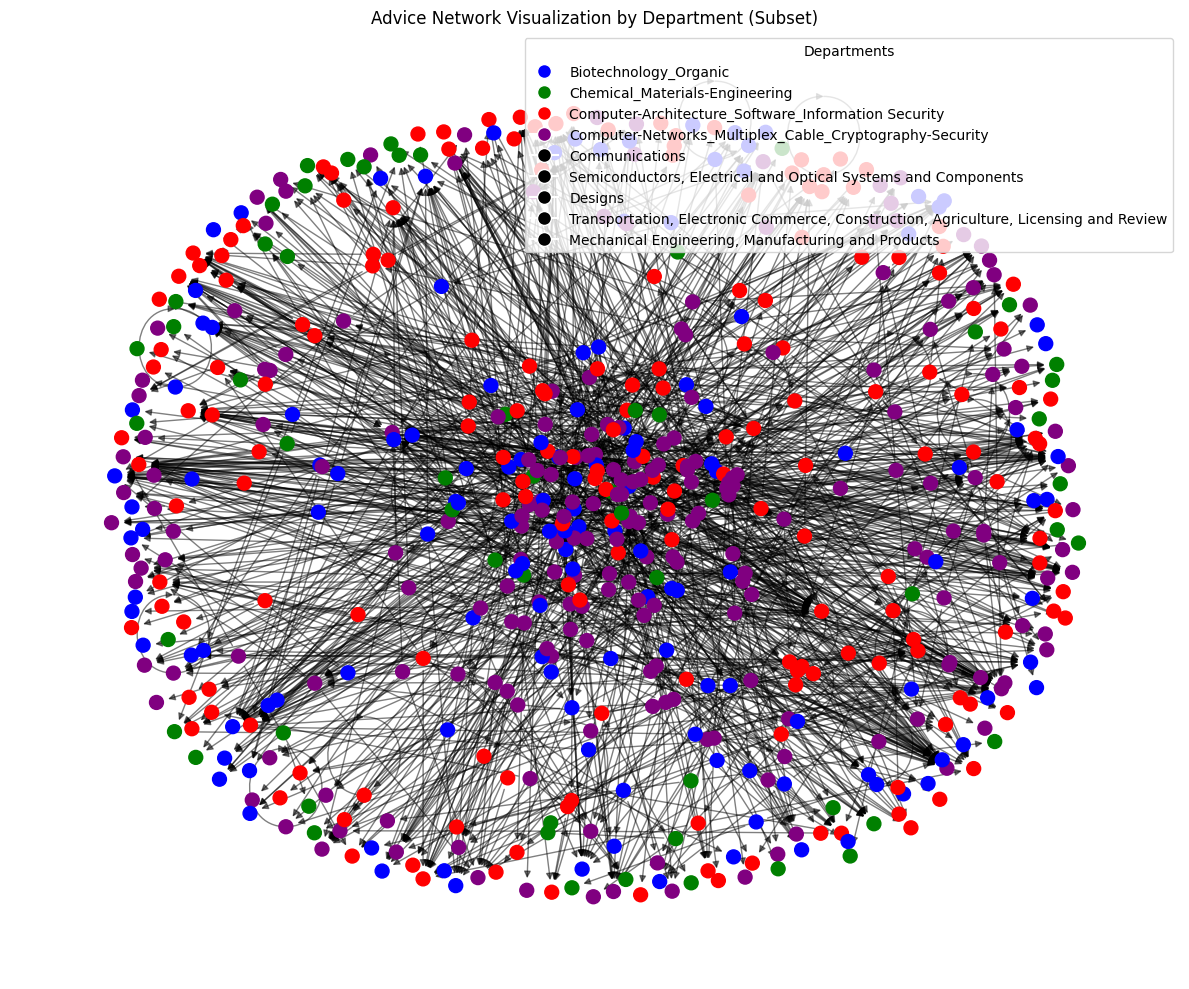

In [25]:

# Visualize the network with departments (using a subset for clarity)
plt.figure(figsize=(12, 10))
subset_nodes = list(G.nodes())[:600]  # Limit to first 200 nodes for visibility
subset_G = G.subgraph(subset_nodes)

# Create a color map for tech centers
tech_center_to_color = {
    16: 'blue',         # Biotechnology_Organic
    17: 'green',        # Chemical_Materials-Engineering
    21: 'red',          # Computer-Architecture_Software_Information Security
    24: 'purple',       # Computer-Networks_Multiplex_Cable_Cryptography-Security
    # 26: 'orange',       # Communications
    # 28: 'brown',        # Semiconductors, Electrical and Optical Systems and Components
    # 29: 'pink',         # Designs
    # 36: 'gray',         # Transportation, Electronic Commerce, Construction, Agriculture, Licensing and Review
    # 37: 'cyan'          # Mechanical Engineering, Manufacturing and Products
}

# Get node colors based on tech_center attribute
node_colors = []
for node in subset_G.nodes():
    if 'tech_center' in subset_G.nodes[node]:
        tech_center = subset_G.nodes[node]['tech_center']
        node_colors.append(tech_center_to_color.get(tech_center, 'black'))
    else:
        node_colors.append('black')  # Default color for nodes without tech_center attribute

# Create network layout
pos = nx.spring_layout(subset_G, seed=42)

# Draw nodes and edges
nx.draw_networkx_nodes(subset_G, pos, node_color=node_colors, node_size=100)
nx.draw_networkx_edges(subset_G, pos, alpha=0.5, arrows=True, arrowsize=10)

# Create legend for departments
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', 
                              markerfacecolor=color, markersize=10, label=dept)
                  for tech_center, dept in tech_center_to_department.items()
                  for color in [tech_center_to_color.get(tech_center, 'black')]]

plt.legend(handles=legend_elements, title="Departments", loc="upper right")

plt.title('Advice Network Visualization by Department (Subset)')
plt.axis('off')
plt.tight_layout()
plt.show()